## 1.构建数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)


def make_data():
    n_train, n_test, n_features = 50, 100, 100
    w, b = np.ones((n_features, 1)) * 0.2, 2
    np.random.seed(1)
    x = np.random.normal(size=(n_train + n_test, n_features))
    y = np.matmul(x, w) + b
    y += np.random.normal(scale=0.2, size=y.shape)
    x_train, x_test = x[:n_train, :], x[n_train:, :]
    y_train, y_test = y[:n_train, :], y[n_train:, :]
    return x_train, x_test, y_train, y_test

## 2.构建损失函数和梯度下降

In [2]:
def prediction(X, W, bias):
    return np.matmul(X, W) + bias  # [m,n] @ [n,1] = [m,1]


def cost_function(X, y, W, bias, lam):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    J = 0.5 * (1 / m) * np.sum((y - y_hat) ** 2)
    Reg = lam / (2 * n) * np.sum(W ** 2)
    return J + Reg


def gradient_descent(X, y, W, bias, alpha, lam):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    grad_w = -(1 / m) * np.matmul(X.T, (y - y_hat)) + (lam / n) * W  # [n,m] @ [m,1] = [n,1]
    grad_b = -(1 / m) * np.sum(y - y_hat)  # 求解梯度
    W = W - alpha * grad_w  # 梯度下降
    bias = bias - alpha * grad_b
    return W, bias


## 3.模型训练

In [3]:
def train(x_train, x_test, y_train, y_test, ite=300, alpha=0.2, lam=0):
    X, y = x_train, y_train
    m, n = X.shape  # 506,13
    W = np.random.randn(n, 1)
    b = 0.1
    costs_train, costs_test = [], []
    for i in range(ite):
        J_train = cost_function(x_train, y_train, W, b, lam)
        J_test = cost_function(x_test, y_test, W, b, lam)
        costs_train.append(J_train)
        costs_test.append(J_test)
        W, b = gradient_descent(x_train, y_train, W, b, alpha, lam)

    return costs_train, costs_test

## 4.运行结果及可视化

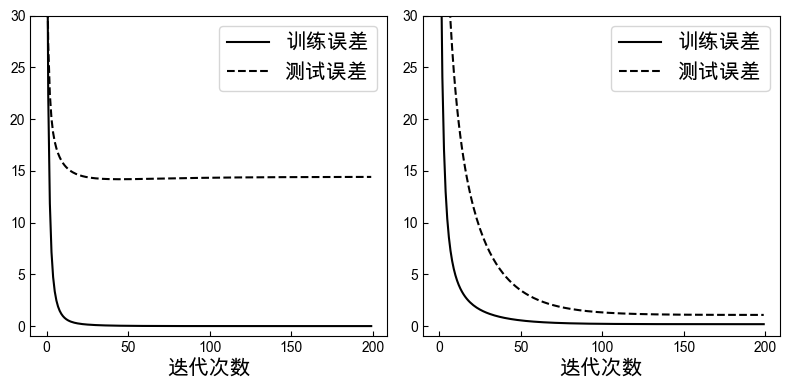

In [4]:
if __name__ == '__main__':
    x_train, x_test, y_train, y_test = make_data()
    iterations = 200
    plt.figure(figsize=(8, 4))
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.subplot(1, 2, 1)
    costs_train, costs_test = train(x_train, x_test, y_train, y_test, ite=iterations, alpha=0.12, lam=0)
    plt.plot(range(iterations), costs_train, label='训练误差', c='black')
    plt.plot(range(iterations), costs_test, label='测试误差', linestyle='--', c='black')
    plt.legend(fontsize=15)
    plt.ylim(-1, 30)
    plt.xlabel('迭代次数', fontsize=15)

    plt.subplot(1, 2, 2)
    costs_train, costs_test = train(x_train, x_test, y_train, y_test, ite=iterations, alpha=0.12, lam=20)
    plt.plot(range(iterations), costs_train, label='训练误差', c='black')
    plt.plot(range(iterations), costs_test, label='测试误差', linestyle='--', c='black')

    plt.legend(fontsize=15)
    plt.ylim(-1, 30)
    plt.xlabel('迭代次数', fontsize=15)
    plt.tight_layout()
    plt.show()
